In [320]:
import pandas as pd 

df = pd.read_csv('./collecting_data/full_data.csv')
df.head()

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description
0,0,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | UPDATE...,"1,018 views",https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...
1,1,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | CAPTUR...,"5,481 views",https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...
2,2,JAGER PRO™,79.6K subscribers,JAGER PRO™ 4G CAMERA 10-STEP SETUP,"1,393 views",https://www.youtube.com/watch?v=9zabPhfVxRs,53,3,"In this video, we go over all the steps needed..."
3,3,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | 100% C...,"6,688 views",https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...
4,4,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | Perfor...,"10,992 views",https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...


In [321]:
df['Channel'].value_counts()

Motherboard              270
NVT HomeMade             270
BuriedONE                270
TIMON SHOW               270
Haas Automation, Inc.    270
                        ... 
Dark Space                12
Being Desi                10
chasechocolate             7
SkY neT 5                  4
GeekMD                     1
Name: Channel, Length: 225, dtype: int64

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9033 entries, 0 to 9032
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   9033 non-null   int64 
 1   Channel      9033 non-null   object
 2   Subs         8973 non-null   object
 3   Title        9033 non-null   object
 4   Views        9033 non-null   object
 5   Link         9033 non-null   object
 6   Likes        9033 non-null   object
 7   Dislikes     9033 non-null   object
 8   Description  8898 non-null   object
dtypes: int64(1), object(8)
memory usage: 635.3+ KB


## Data Cleaning
In order to truly get a good representation of the type of language used in youtube titles, I wanted to have consistency with the data being used. For that reason I cleaned the data based on the following rules:
- Titles must be in english
- Remove channel name if in the title
- Only english charachters we're kept
- Outliers (Viral Videos) were removed in order to capture a general creator's language

In [323]:
df.drop_duplicates(inplace=True, subset=['Title'])
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8908 non-null   int64 
 1   Channel      8908 non-null   object
 2   Subs         8848 non-null   object
 3   Title        8908 non-null   object
 4   Views        8908 non-null   object
 5   Link         8908 non-null   object
 6   Likes        8908 non-null   object
 7   Dislikes     8908 non-null   object
 8   Description  8776 non-null   object
dtypes: int64(1), object(8)
memory usage: 626.5+ KB


In [324]:
#Dropping all videos with unreported view count
#https://stackoverflow.com/questions/53775386/how-to-convert-number-mixed-with-character-to-integer-in-pandas
import re

df['Views'] = df['Views'].str.replace('\D+','').astype(int)
df = df[df['Views'] != -1] #When collecting the data, if view count was unreported I had the script fill it with -1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 8907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8908 non-null   int64 
 1   Channel      8908 non-null   object
 2   Subs         8848 non-null   object
 3   Title        8908 non-null   object
 4   Views        8908 non-null   int32 
 5   Link         8908 non-null   object
 6   Likes        8908 non-null   object
 7   Dislikes     8908 non-null   object
 8   Description  8776 non-null   object
dtypes: int32(1), int64(1), object(7)
memory usage: 661.1+ KB


In [325]:
# Dropping all videos without english titles
from langdetect import detect
def is_en(sent):
    try:
        if detect(sent) == 'en':
            return True
        else:
            return False
    except:
        return False

df['english'] = df['Title'].apply(is_en)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8908 entries, 0 to 8907
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8908 non-null   int64 
 1   Channel      8908 non-null   object
 2   Subs         8848 non-null   object
 3   Title        8908 non-null   object
 4   Views        8908 non-null   int32 
 5   Link         8908 non-null   object
 6   Likes        8908 non-null   object
 7   Dislikes     8908 non-null   object
 8   Description  8776 non-null   object
 9   english      8908 non-null   bool  
dtypes: bool(1), int32(1), int64(1), object(7)
memory usage: 669.8+ KB


In [326]:
df['english'].value_counts()

True     6732
False    2176
Name: english, dtype: int64

In [327]:
df = df[df['english'] == True]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6732 entries, 0 to 8907
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6732 non-null   int64 
 1   Channel      6732 non-null   object
 2   Subs         6681 non-null   object
 3   Title        6732 non-null   object
 4   Views        6732 non-null   int32 
 5   Link         6732 non-null   object
 6   Likes        6732 non-null   object
 7   Dislikes     6732 non-null   object
 8   Description  6631 non-null   object
 9   english      6732 non-null   bool  
dtypes: bool(1), int32(1), int64(1), object(7)
memory usage: 506.2+ KB


In [328]:
#Removing non english characters from the titles
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | UPDATE...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | CAPTUR...,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
3,3,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | 100% C...,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
4,4,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | Perfor...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
5,5,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | JAGER PRO™ TV Show | How To...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True


In [329]:
df = df_copy.copy()

In [330]:
#Remove channel name if in title
def remove_chan(sent):
    return sent.replace(sent['Channel'], '')

df['Title'] = df.apply(lambda x: x['Title'].replace(x['Channel'], ''), axis=1)
df['Title']
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | UPDATE: FLINT RI...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | CAPTURE SUCCESS,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
3,3,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | 100% CAPTURE SUC...,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
4,4,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | Performance Base...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
5,5,JAGER PRO™,79.6K subscribers,WILD HOG CONTROL | TV Show | How To Zero Puls...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
8903,4507,BadSeed Tech,260K subscribers,Glorious Panda Switch Review: Holy Cow they TH...,211029,https://www.youtube.com/watch?v=aUnm2DFTrzo,-1,-1,Checking out the new Glorious (Definitely NOT ...,True
8904,4508,BadSeed Tech,260K subscribers,Glorious Model D- Gaming Mouse Review: Does it...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
8905,4509,BadSeed Tech,260K subscribers,Logitech Color Collection & G733 Wireless Head...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
8906,4510,BadSeed Tech,260K subscribers,Filco Majestouch Minila-R Convertible Review: ...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [331]:
#Removing non english characters from the titles
#https://www.analyticssteps.com/blogs/extracting-pre-processing-youtube-comments
from nltk.tokenize import word_tokenize

def clean_title(sent):
    sent = word_tokenize(sent)
    return ' '.join([i for i in sent if i.isalpha()]).lower()

df['Title'] = df['Title'].apply(clean_title)
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
3,3,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
4,4,JAGER PRO™,79.6K subscribers,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
5,5,JAGER PRO™,79.6K subscribers,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
8903,4507,BadSeed Tech,260K subscribers,glorious panda switch review holy cow they thocc,211029,https://www.youtube.com/watch?v=aUnm2DFTrzo,-1,-1,Checking out the new Glorious (Definitely NOT ...,True
8904,4508,BadSeed Tech,260K subscribers,glorious model gaming mouse review does it mea...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
8905,4509,BadSeed Tech,260K subscribers,logitech color collection wireless headset rev...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
8906,4510,BadSeed Tech,260K subscribers,filco majestouch convertible review weird wire...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [332]:
#Reset index after cleaning data
df.reset_index(drop=True ,inplace=True)
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79.6K subscribers,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
2,3,JAGER PRO™,79.6K subscribers,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
3,4,JAGER PRO™,79.6K subscribers,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
4,5,JAGER PRO™,79.6K subscribers,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
6727,4507,BadSeed Tech,260K subscribers,glorious panda switch review holy cow they thocc,211029,https://www.youtube.com/watch?v=aUnm2DFTrzo,-1,-1,Checking out the new Glorious (Definitely NOT ...,True
6728,4508,BadSeed Tech,260K subscribers,glorious model gaming mouse review does it mea...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
6729,4509,BadSeed Tech,260K subscribers,logitech color collection wireless headset rev...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
6730,4510,BadSeed Tech,260K subscribers,filco majestouch convertible review weird wire...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [333]:
df['Views'].describe()

count    6.732000e+03
mean     1.840854e+05
std      1.117012e+06
min      1.000000e+00
25%      2.012000e+03
50%      9.236500e+03
75%      4.168925e+04
max      2.764250e+07
Name: Views, dtype: float64

In [334]:
'''
Removing the outliers
To remove the outliers I calculated the low fence(q1 - 1.5(IQR)) and high fence(q3+1.5(IQR))
'''

q1 = df['Views'].quantile(0.25)
q3 = df['Views'].quantile(.75)
IQR = q3 - q1

fence_low = q1-(1.5*IQR)
fence_high = q3+(1.5*IQR)
print(fence_low, fence_high)

-57503.875 101205.125


In [335]:
df = df[df['Views'] < fence_high]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755 entries, 0 to 5754
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5755 non-null   int64 
 1   Channel      5755 non-null   object
 2   Subs         5704 non-null   object
 3   Title        5755 non-null   object
 4   Views        5755 non-null   int32 
 5   Link         5755 non-null   object
 6   Likes        5755 non-null   object
 7   Dislikes     5755 non-null   object
 8   Description  5666 non-null   object
 9   english      5755 non-null   bool  
dtypes: bool(1), int32(1), int64(1), object(7)
memory usage: 387.9+ KB


In [336]:
df['Views'].describe()

count      5755.000000
mean      15638.073328
std       21764.040457
min           1.000000
25%        1592.000000
50%        6177.000000
75%       19124.000000
max      101192.000000
Name: Views, dtype: float64

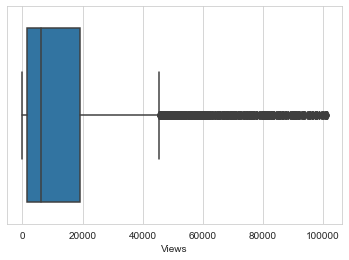

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.boxplot(x=df['Views'])
plt.show()

0       796
1       796
2       796
3       796
4       796
       ... 
2734    224
2735    224
2736    224
2737    224
2738    224
Name: Subs, Length: 2713, dtype: int32

In [338]:
# Cleaning Subs data
def conversion(value):
    if 'M' in value:
        return int(float(value[:-1]) * 1000000)
    elif 'K' in value:
        return int(float(value[:-1]) * 1000)
    else:
        return value
df = df.dropna(subset=['Subs'])
df['Subs'] = df['Subs'].apply(lambda x: str(x).split(' ')[0])
df['Subs'] = df['Subs'].apply(conversion)
df.head()

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79600,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79600,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
2,3,JAGER PRO™,79600,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
3,4,JAGER PRO™,79600,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
4,5,JAGER PRO™,79600,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True


In [339]:
df

,Unnamed: 0,Channel,Subs,Title,Views,Link,Likes,Dislikes,Description,english
0,0,JAGER PRO™,79600,wild hog control tv show update flint river pr...,1018,https://www.youtube.com/watch?v=Qw3k9jx-_2o,96,1,We are excited to share our passion with you t...,True
1,1,JAGER PRO™,79600,wild hog control tv show capture success,5481,https://www.youtube.com/watch?v=JcxbwQRa0qA,251,4,We are excited to share our passion with you t...,True
2,3,JAGER PRO™,79600,wild hog control tv show capture success,6688,https://www.youtube.com/watch?v=UVJNz5G68qQ,-1,-1,We are excited to share our passion with you t...,True
3,4,JAGER PRO™,79600,wild hog control tv show performance based dec...,10992,https://www.youtube.com/watch?v=cVtNaJF2nJw,317,6,We are excited to share our passion with you t...,True
4,5,JAGER PRO™,79600,wild hog control tv show how to zero pulsar op...,6093,https://www.youtube.com/watch?v=Ig115mHuM_I,272,5,We are excited to share our passion with you t...,True
...,...,...,...,...,...,...,...,...,...,...
5750,4506,BadSeed Tech,260000,hati s gaming mouse review pricy but promising,49424,https://www.youtube.com/watch?v=kUSZscFAfrw,-1,-1,Review of the PRE-RELEASE sample for the G-Wol...,True
5751,4508,BadSeed Tech,260000,glorious model gaming mouse review does it mea...,61486,https://www.youtube.com/watch?v=k7mNLcOTHmk,-1,-1,Proud to be partnering with Dollar Shave Club ...,True
5752,4509,BadSeed Tech,260000,logitech color collection wireless headset rev...,39544,https://www.youtube.com/watch?v=xuzMXjtPa8s,-1,-1,Go to https://www.dashlane.com/badseed to get ...,True
5753,4510,BadSeed Tech,260000,filco majestouch convertible review weird wire...,35123,https://www.youtube.com/watch?v=tO7ZYxjFTCU,-1,-1,For your chance to create your own dream PC se...,True


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704 entries, 0 to 5754
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5704 non-null   int64 
 1   Channel      5704 non-null   object
 2   Subs         5704 non-null   int64 
 3   Title        5704 non-null   object
 4   Views        5704 non-null   int32 
 5   Link         5704 non-null   object
 6   Likes        5704 non-null   object
 7   Dislikes     5704 non-null   object
 8   Description  5615 non-null   object
 9   english      5704 non-null   bool  
dtypes: bool(1), int32(1), int64(2), object(6)
memory usage: 428.9+ KB


In [341]:
df['Subs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5704 entries, 0 to 5754
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5704 non-null   int64 
 1   Channel      5704 non-null   object
 2   Subs         5704 non-null   int64 
 3   Title        5704 non-null   object
 4   Views        5704 non-null   int32 
 5   Link         5704 non-null   object
 6   Likes        5704 non-null   object
 7   Dislikes     5704 non-null   object
 8   Description  5615 non-null   object
 9   english      5704 non-null   bool  
dtypes: bool(1), int32(1), int64(2), object(6)
memory usage: 428.9+ KB


In [342]:
df['Subs'].describe()

count    5.704000e+03
mean     2.281666e+05
std      4.023979e+05
min      1.490000e+04
25%      4.570000e+04
50%      1.010000e+05
75%      2.410000e+05
max      4.030000e+06
Name: Subs, dtype: float64

# Analyzing the data
Now that the data is cleaned, we can begin to analyze the data. The goal of this analysis is to see what kind of langauge is used by different sized youtube channels and how well this translates over to views. Our data was seperated by subscriber counts into 4 groups. The type of analysis we will be doing is:
- Looking at most frequent bigrams and trigrams
- 

In [343]:
df_25 = df[df['Subs'] < df['Subs'].quantile(0.33)]
df_50 = df[(df['Subs'] >= df['Subs'].quantile(0.33)) & (df['Subs'] <= df['Subs'].quantile(.66))]
#df_75 = df[(df['Subs'] > df['Subs'].quantile(0.50)) & (df['Subs'] <= df['Subs'].quantile(.75))]
df_75 = df[df['Subs'] > df['Subs'].quantile(0.66)]

print(len(df_25), len(df_50), len(df_75))

1872 1923 1909


In [344]:
import nltk
from itertools import chain

df_titles_25 = df_25['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens_25 = list(chain.from_iterable(df_titles_25))
title_tokens_25 = [w.lower() for w in title_tokens_25 if w.isalnum()]

df_titles_50 = df_50['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens_50 = list(chain.from_iterable(df_titles_50))
title_tokens_50 = [w.lower() for w in title_tokens_50 if w.isalnum()]

df_titles_75 = df_75['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
title_tokens_75 = list(chain.from_iterable(df_titles_75))
title_tokens_75 = [w.lower() for w in title_tokens_75 if w.isalnum()]

#df_titles_100 = df_100['Title'].apply(lambda row: nltk.word_tokenize(row)).tolist()
#title_tokens_100 = list(chain.from_iterable(df_titles_100))
#title_tokens_100 = [w.lower() for w in title_tokens_100 if w.isalnum()]

In [345]:
bigrams_25 = nltk.FreqDist(nltk.ngrams(title_tokens_25, 2))
bigrams_25.most_common(5)

[(('how', 'to'), 111),
 (('to', 'buy'), 33),
 (('top', 'best'), 28),
 (('buy', 'in'), 28),
 (('by', 'techylover'), 26)]

In [346]:
bigrams_50 = nltk.FreqDist(nltk.ngrams(title_tokens_50, 2))
bigrams_50.most_common(5)

[(('how', 'to'), 111),
 (('wild', 'hog'), 50),
 (('hog', 'trapping'), 48),
 (('tv', 'show'), 34),
 (('tonight', 'i'), 31)]

In [347]:
bigrams_75 = nltk.FreqDist(nltk.ngrams(title_tokens_75, 2))
bigrams_75.most_common(5)

[(('how', 'to'), 194),
 (('haas', 'automation'), 96),
 (('of', 'the'), 45),
 (('automation', 'service'), 45),
 (('youtube', 'channel'), 37)]

In [348]:
sent = ""
avg_view_per_bi_25 = {}
for bi, freq in bigrams_25.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df_25[df_25['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi_25[sent] = avg_views
print(avg_view_per_bi_25)


{'how to': 15077.531531531531, 'to buy': 3657.757575757576, 'top best': 1962.0714285714287, 'buy in': 211.85714285714286, 'by techylover': 4212.153846153846, 'in top': 0.0, 'dld sync': 2156.090909090909, 'mining rig': 22775.666666666668, 'in hindi': 3415.0476190476193, 'hindi by': 3415.0476190476193, 'to mine': 20953.1, 'in the': 12335.166666666666, 'samsung galaxy': 1100.611111111111, 'ham radio': 7884.055555555556, 'first look': 19950.0, 'jim heath': 7015.235294117647, 'q a': 2888.0625, 'of the': 5727.8125, 'factory reset': 1634.4375, 'gpu mining': 22282.066666666666, 'newman motor': 478.26666666666665, 'google account': 46235.933333333334, 'hard reset': 1686.2857142857142, 'reset factory': 1686.2857142857142, 'the best': 13132.461538461539, 'with arduino': 34403.07692307692, 'getting started': 27041.53846153846, 'build a': 30506.76923076923, 'design build': 17316.846153846152, 'and review': 13512.0, 'the world': 19039.0, 'arduino ide': 47204.25, 'azure sql': 398.5833333333333, 'mast

In [349]:
#https://www.geeksforgeeks.org/python-program-to-find-the-highest-3-values-in-a-dictionary/
from heapq import nlargest 
largest_15_keys_25 = nlargest(15, avg_view_per_bi_25, key=avg_view_per_bi_25.get)
largest_15_values_25 = []
for val in largest_15_keys_25:
    largest_15_values_25.append(avg_view_per_bi_25[val])
print(largest_15_values_25)
print(largest_15_keys_25)

[128699.0, 92691.75, 92654.0, 89072.5, 87266.0, 81929.0, 79726.0, 70117.5, 68711.0, 67231.66666666667, 66299.5, 65124.333333333336, 63055.5, 61224.0, 60954.0]
['in a', 'with a', 'mining eth', 'r for', 'on a', 'build an', 'rgb review', 'cards for', 'remove pattern', 'challenge replay', 'ide getting', 'mavic mini', 'the mining', 'using a', 'asus zenfone']


In [350]:
sent = ""
avg_view_per_bi_50 = {}
for bi, freq in bigrams_50.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df_50[df_50['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi_50[sent] = avg_views
print(avg_view_per_bi_50)

{'how to': 7636.621621621622, 'wild hog': 13886.6, 'hog trapping': 16724.770833333332, 'tv show': 8893.764705882353, 'tonight i': 22657.064516129034, 'to make': 15255.833333333334, 'samsung galaxy': 8753.137931034482, 'q a': 45619.724137931036, 'show preview': 7017.84, 'preview episode': 7017.84, 'i ll': 24006.045454545456, 'll be': 24006.045454545456, 'in india': 24059.090909090908, 'of the': 7168.238095238095, 'tv episode': 602.85, 'pubg mobile': 11592.5, 'maintenance minute': 1144.888888888889, 'be eating': 31176.647058823528, 'in the': 11712.764705882353, 'on the': 11564.8125, 'urdu hindi': 2431.5, 'episode wild': 0.0, 'unboxing review': 2892.733333333333, 'top best': 18351.266666666666, 'guru bhai': 5075.466666666666, 'episode promo': 696.8571428571429, 'the best': 12991.42857142857, 'hog control': 13949.384615384615, 'promo wild': 0.0, 'hog hunting': 36195.75, 'iphone pro': 8248.833333333334, 'unboxing and': 35691.166666666664, 'is the': 8434.25, 'to the': 9859.666666666666, 'xbo

In [351]:
largest_15_keys_50 = nlargest(15, avg_view_per_bi_50, key=avg_view_per_bi_50.get)
largest_15_values_50 = []
for val in largest_15_keys_50:
    largest_15_values_50.append(avg_view_per_bi_50[val])
print(largest_15_values_50)
print(largest_15_keys_50)

[101321.0, 88404.5, 88018.0, 87853.0, 87313.5, 85135.0, 83993.5, 82198.66666666667, 79259.33333333333, 76120.0, 75340.33333333333, 71036.0, 70683.66666666667, 68373.33333333333, 66898.5]
['in a', 'and a', 'speaker review', 'a v', 'all the', 'and fly', 'india working', 'coding a', 'to a', 'voxel game', 'video editing', 'with video', 'john smith', 'trapping capture', 'get a']


In [352]:
sent = ""
avg_view_per_bi_75 = {}
for bi, freq in bigrams_75.most_common(1000):
    sent = bi[0] + " " + bi[1]
    total_app = df_75[df_75['Title'].str.contains(sent)]
    avg_views = total_app['Views'].sum() / freq
    avg_view_per_bi_75[sent] = avg_views
print(avg_view_per_bi_75)

{'how to': 14916.11855670103, 'haas automation': 19920.927083333332, 'of the': 32770.4, 'automation service': 10852.644444444444, 'youtube channel': 17098.35135135135, 'free fire': 3495.054054054054, 'on youtube': 27819.884615384617, 'the day': 33294.5, 'tip of': 34077.36, 'iphone pro': 38230.291666666664, 'apps minute': 8878.041666666666, 'to make': 19718.739130434784, 'deep learning': 17888.217391304348, 'technical boss': 19361.47619047619, 'first look': 25587.3, 'late upload': 17002.315789473683, 'new update': 6869.5, 'in the': 30692.5, 'youtube video': 33810.23529411765, 'new event': 992.5294117647059, 'the haas': 22918.058823529413, 'automation tip': 45381.294117647056, 'automation inc': 26236.41176470588, 'dc motor': 22288.176470588234, 'by technical': 16153.70588235294, 'to get': 19879.875, 'the best': 44506.1875, 'samsung galaxy': 28787.4375, 'crushing crunchy': 18987.9375, 'crunchy soft': 18987.9375, 'soft things': 18987.9375, 'things by': 18987.9375, 'by car': 18987.9375, 'in

In [353]:
largest_15_keys_75 = nlargest(15, avg_view_per_bi_75, key=avg_view_per_bi_75.get)
largest_15_values_75 = []
for val in largest_15_keys_75:
    largest_15_values_75.append(avg_view_per_bi_75[val])
print(largest_15_values_75)
print(largest_15_keys_75)

[762030.3333333334, 312715.0, 238117.0, 209802.25, 195978.0, 173277.2, 143117.33333333334, 126155.0, 116238.5, 92203.5, 91122.5, 87001.66666666667, 85806.33333333333, 83507.5, 81520.0]
['as a', 's first', 'on and', 'review a', 'to a', 'on a', 'for a', 'rs in', 'phone vs', 'a to', 'bluetooth speakers', 'of a', 'india june', 'the lost', 'experiment aluminum']


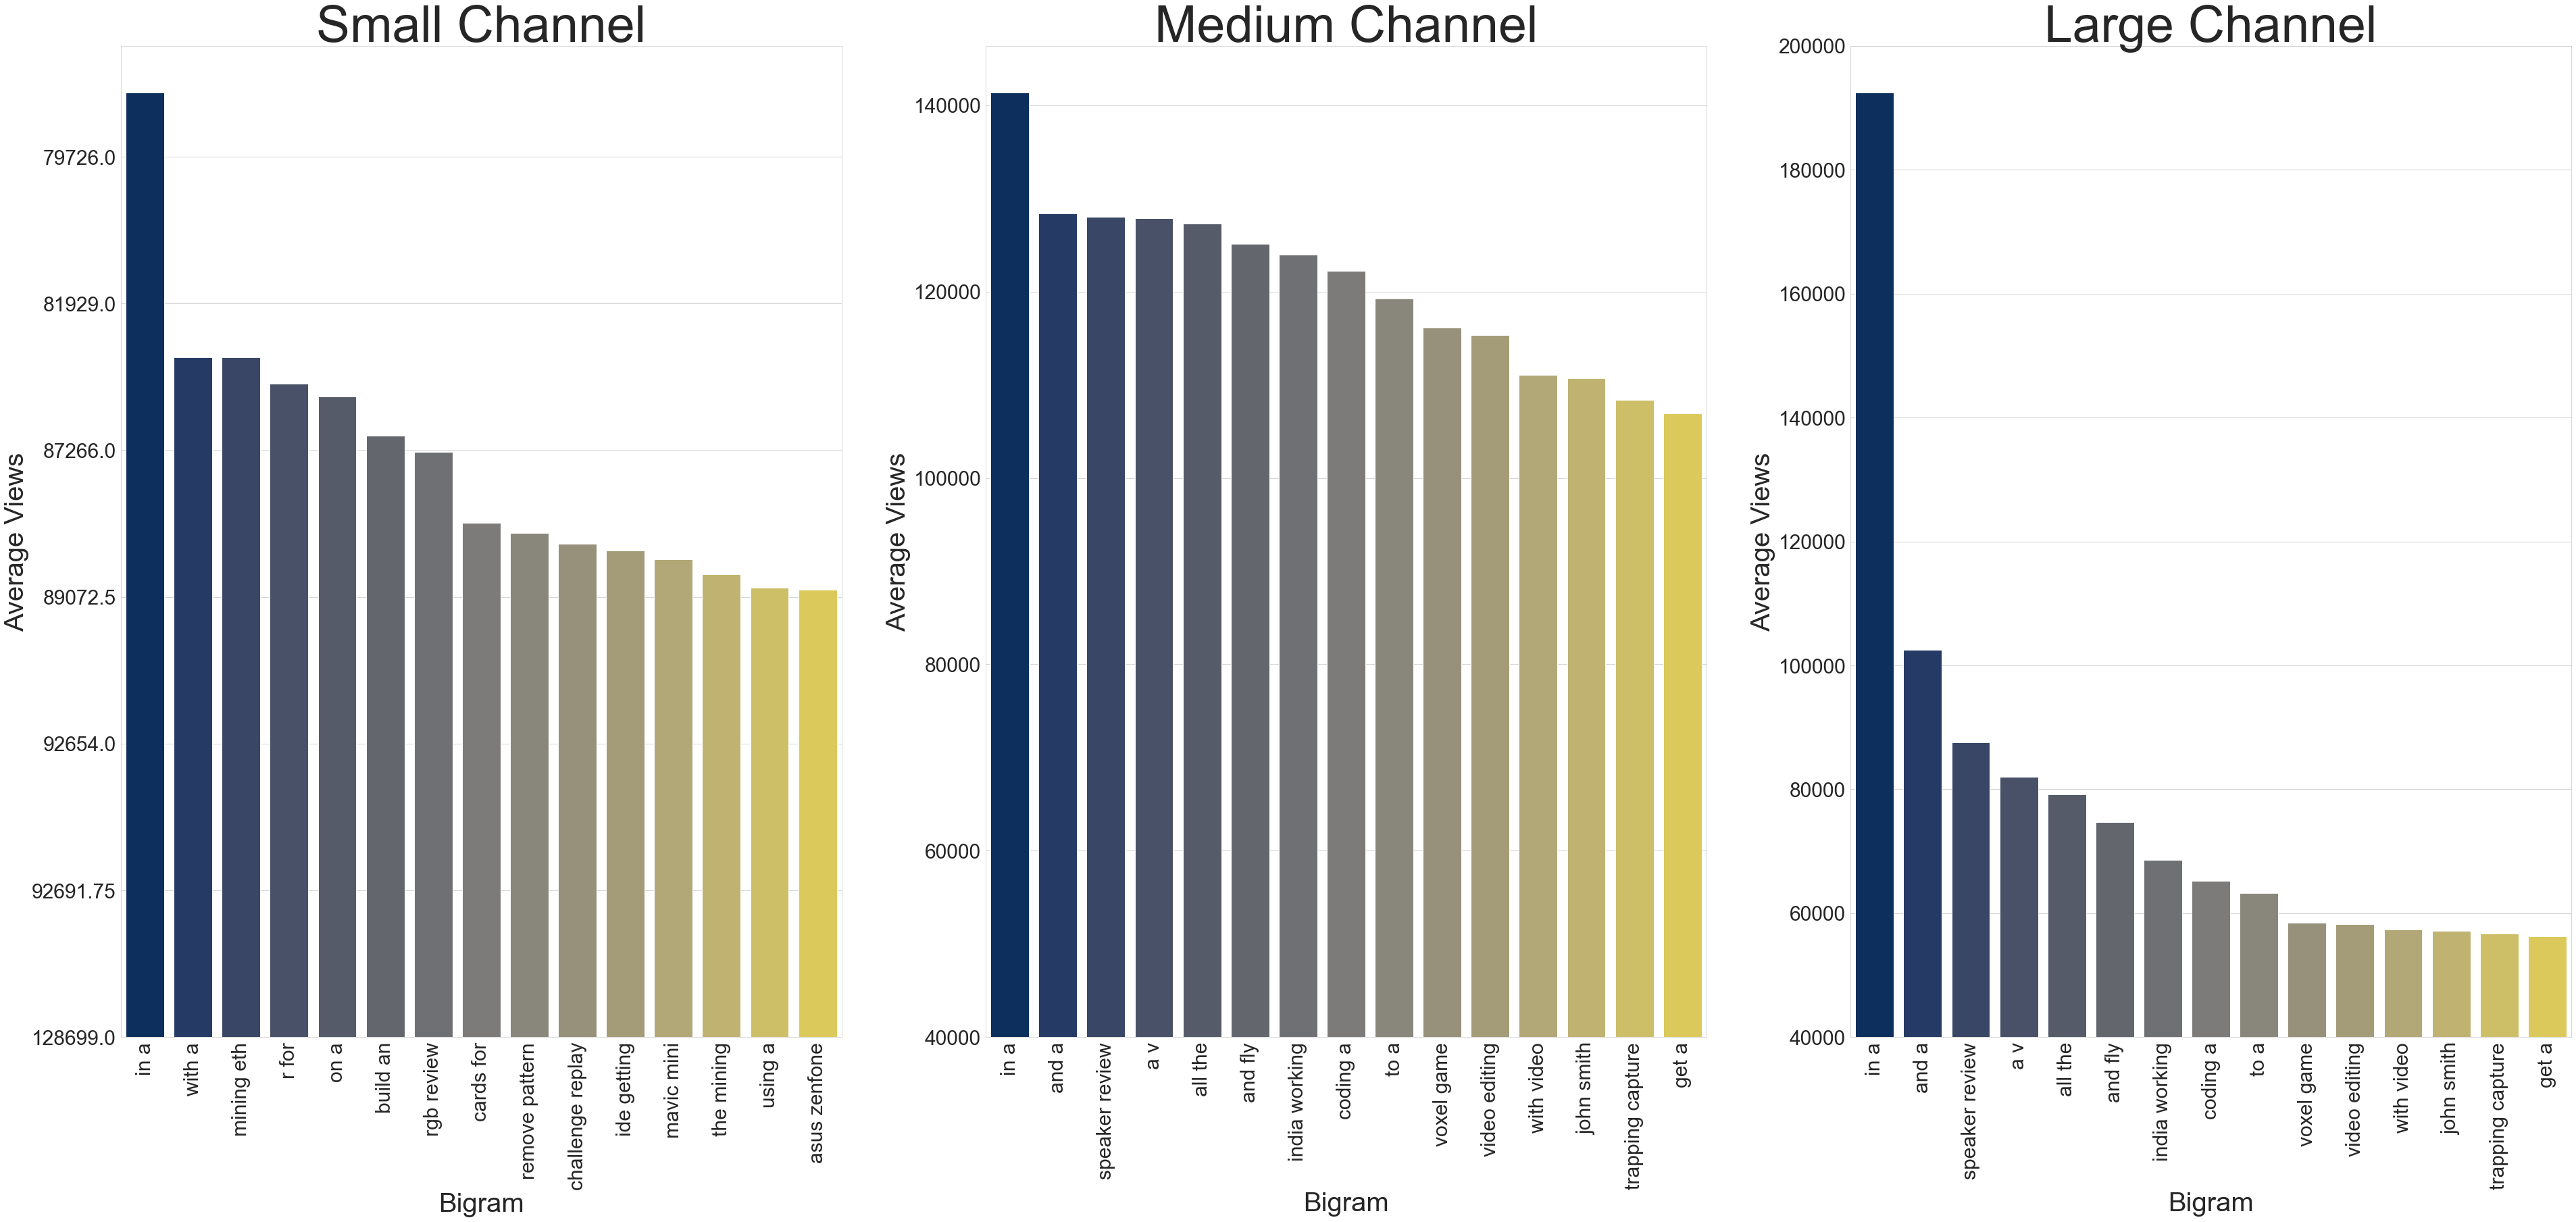

In [354]:
#https://stackoverflow.com/questions/48204780/how-to-plot-multiple-figures-in-a-row-using-seaborn

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(65,27))
sns.barplot(x=largest_15_keys_25, y=largest_15_values_25, palette='cividis', ax=ax1)
ax1.set_xticklabels(rotation=90, labels=largest_15_keys_25, fontsize=30)
ax1.set_xlabel("Bigram", fontsize=40)

ax1.set_yticklabels(labels=largest_15_values_25, fontsize=30)
ax1.set_ylabel('Average Views', fontsize=40)

ax1.set_title("Small Channel", fontsize=75)

sns.barplot(x=largest_15_keys_50, y=largest_15_values_50, palette='cividis', ax=ax2)
ax2.set_xticklabels(rotation=90, labels=largest_15_keys_50, fontsize=30)
ax2.set_xlabel("Bigram", fontsize=40)

ax2.set_yticklabels(labels=range(40000,280000,20000), fontsize=30)
ax2.set_ylabel('Average Views', fontsize=40)

ax2.set_title("Medium Channel", fontsize=75)

sns.barplot(x=largest_15_keys_75, y=largest_15_values_75, palette='cividis', ax=ax3)
ax3.set_xticklabels(rotation=90, labels=largest_15_keys_50, fontsize=30)
ax3.set_xlabel("Bigram", fontsize=40)

ax3.set_yticklabels(labels=range(40000,280000,20000), fontsize=30)
ax3.set_ylabel('Average Views', fontsize=40)

ax3.set_title("Large Channel", fontsize=75)

plt.show()


In [355]:
# length of words in the title
df_25['Title Word Count'] = df_25['Title'].apply(lambda sent: len(sent.split(' ')))
df_50['Title Word Count'] = df_50['Title'].apply(lambda sent: len(sent.split(' ')))
df_75['Title Word Count'] = df_75['Title'].apply(lambda sent: len(sent.split(' ')))


In [356]:
df_25['Title Word Count'].describe()

count    1872.000000
mean        7.456197
std         3.005110
min         1.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        18.000000
Name: Title Word Count, dtype: float64

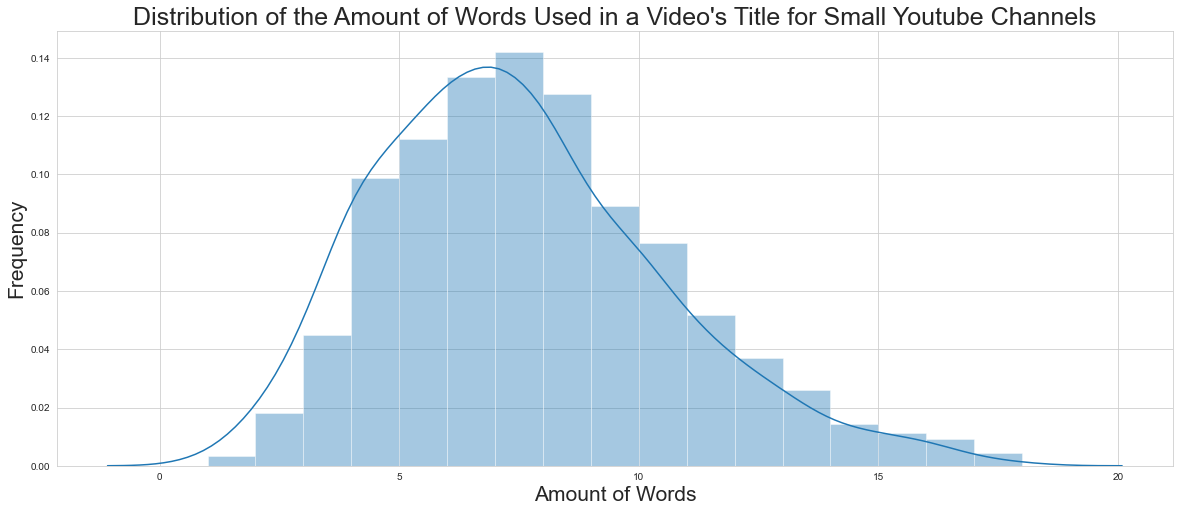

In [357]:
plt.figure(figsize=(20, 8))
sns.distplot(df_25['Title Word Count'], bins=17)
plt.xlabel('Amount of Words', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Amount of Words Used in a Video's Title for Small Youtube Channels", fontSize=25)
plt.show()

In [358]:
df_50['Title Word Count'].describe()

count    1923.000000
mean        7.711908
std         2.906485
min         1.000000
25%         6.000000
50%         7.000000
75%        10.000000
max        19.000000
Name: Title Word Count, dtype: float64

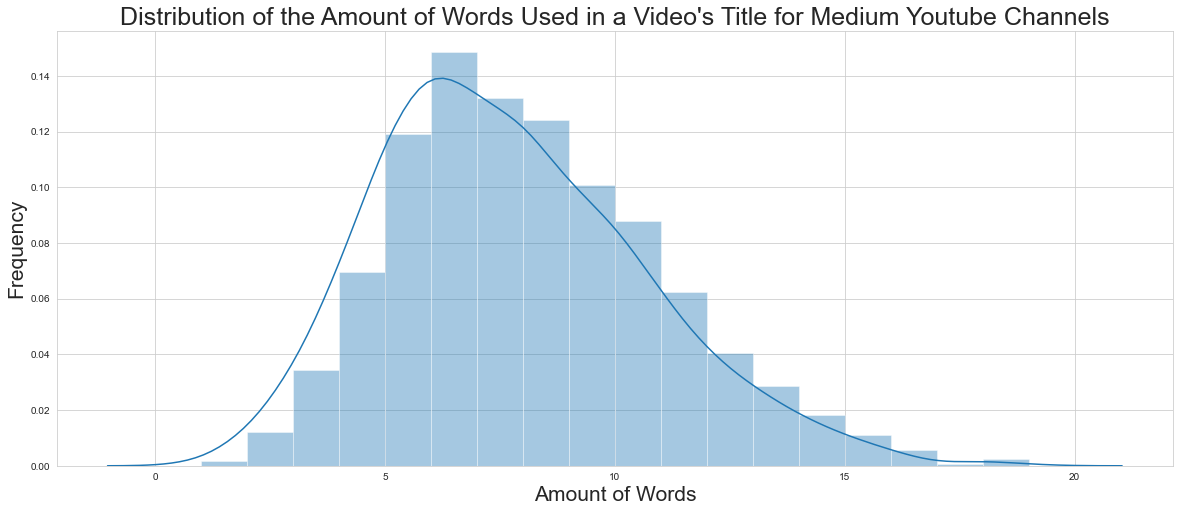

In [359]:
plt.figure(figsize=(20, 8))
sns.distplot(df_50['Title Word Count'], bins=18)
plt.xlabel('Amount of Words', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Amount of Words Used in a Video's Title for Medium Youtube Channels", fontSize=25)
plt.show()

In [360]:
df_75['Title Word Count'].describe()

count    1909.000000
mean        8.059193
std         3.204942
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        19.000000
Name: Title Word Count, dtype: float64

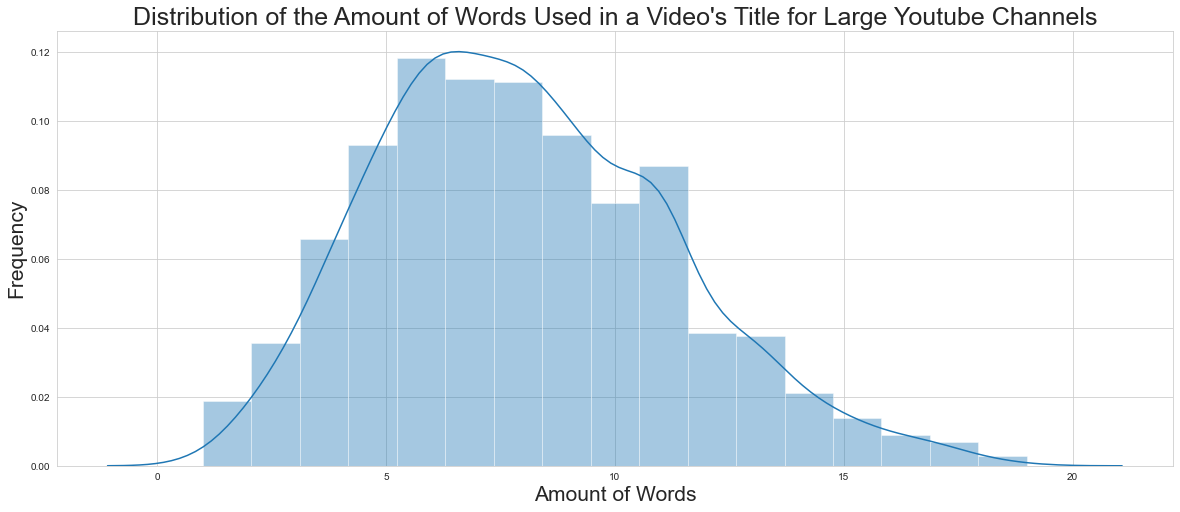

In [361]:
plt.figure(figsize=(20, 8))
sns.distplot(df_75['Title Word Count'], bins=17)
plt.xlabel('Amount of Words', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Amount of Words Used in a Video's Title for Large Youtube Channels", fontSize=25)
plt.show()

In [385]:
# Seeing which title length recieves the largest amount of views
titleSet_25 = set(df_25['Title Word Count'])
wordViews_25 = {}

for x in titleSet_25:
    viewAvg = df_25[df_25['Title Word Count'] == x]['Views'].sum() / len(df_25[df_25['Title Word Count'] == x]['Views'])
    wordViews_25[x] = viewAvg

print(wordViews_25)

{1: 1462.1666666666667, 2: 9710.970588235294, 3: 9404.261904761905, 4: 9635.832432432433, 5: 8340.695238095239, 6: 8663.868, 7: 12126.236842105263, 8: 13302.732217573222, 9: 13355.868263473054, 10: 9134.517482517482, 11: 9012.577319587628, 12: 10446.202898550724, 13: 10813.591836734693, 14: 8209.25925925926, 15: 16062.666666666666, 16: 7986.470588235294, 17: 8995.666666666666, 18: 430.5}


In [386]:
titleSet_50 = set(df_50['Title Word Count'])
wordViews_50 = {}

for x in titleSet_50:
    viewAvg = df_50[df_50['Title Word Count'] == x]['Views'].sum() / len(df_50[df_50['Title Word Count'] == x]['Views'])
    wordViews_50[x] = viewAvg

print(wordViews_50)

{1: 2583.0, 2: 7883.260869565217, 3: 12065.515151515152, 4: 11483.84328358209, 5: 9952.065502183406, 6: 10629.758741258742, 7: 12588.799212598426, 8: 14346.087866108786, 9: 12140.030927835052, 10: 12578.14201183432, 11: 15138.733333333334, 12: 14129.064102564103, 13: 19555.327272727274, 14: 11360.228571428572, 15: 6377.714285714285, 16: 23898.0, 17: 1034.0, 18: 6878.5, 19: 1374.0}


In [387]:
titleSet_75 = set(df_75['Title Word Count'])
wordViews_75 = {}

for x in titleSet_75:
    viewAvg = df_75[df_75['Title Word Count'] == x]['Views'].sum() / len(df_75[df_75['Title Word Count'] == x]['Views'])
    print(df_75[df_75['Title Word Count'] == x]['Views'].sum(), len(df_75[df_75['Title Word Count'] == x]['Views']))
    wordViews_75[x] = viewAvg

print(wordViews_75)

67898 5
941072 33
1827257 72
3631546 133
4652961 188
6243899 239
5582278 227
5922809 225
4458269 194
3868599 154
4355684 176
1608325 78
1427814 76
749797 43
387576 28
405805 18
73515 14
159457 5
2220 1
{1: 13579.6, 2: 28517.333333333332, 3: 25378.569444444445, 4: 27304.85714285714, 5: 24749.792553191488, 6: 26125.100418410042, 7: 24591.533039647577, 8: 26323.595555555556, 9: 22980.768041237112, 10: 25120.772727272728, 11: 24748.204545454544, 12: 20619.55128205128, 13: 18787.026315789473, 14: 17437.13953488372, 15: 13842.0, 16: 22544.722222222223, 17: 5251.071428571428, 18: 31891.4, 19: 2220.0}


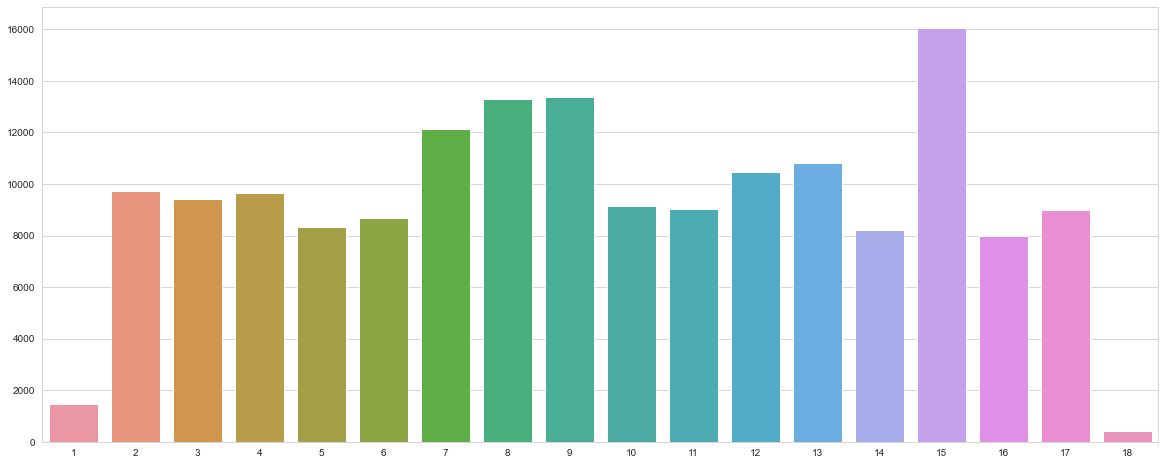

In [388]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(wordViews_25.keys()), y=list(wordViews_25.values()))

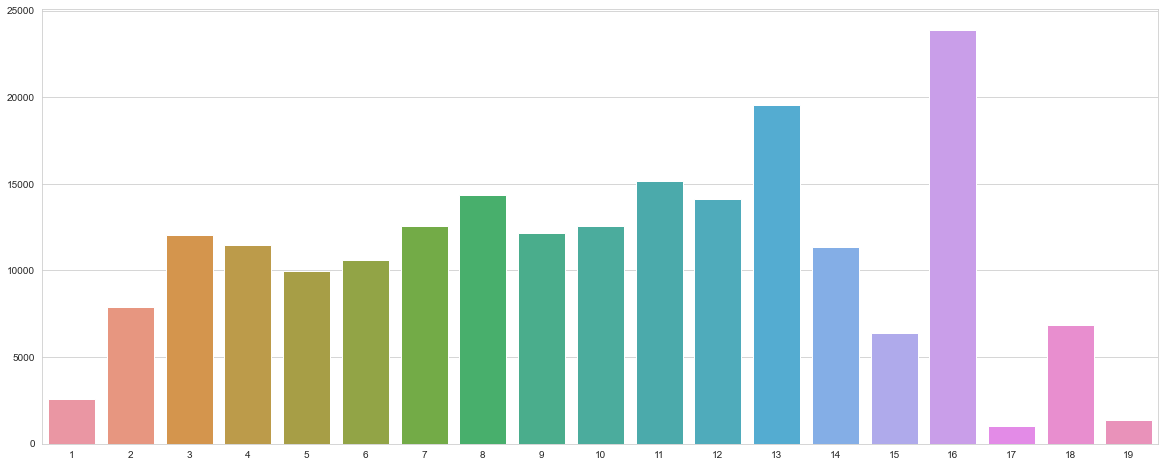

In [389]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(wordViews_50.keys()), y=list(wordViews_50.values()))

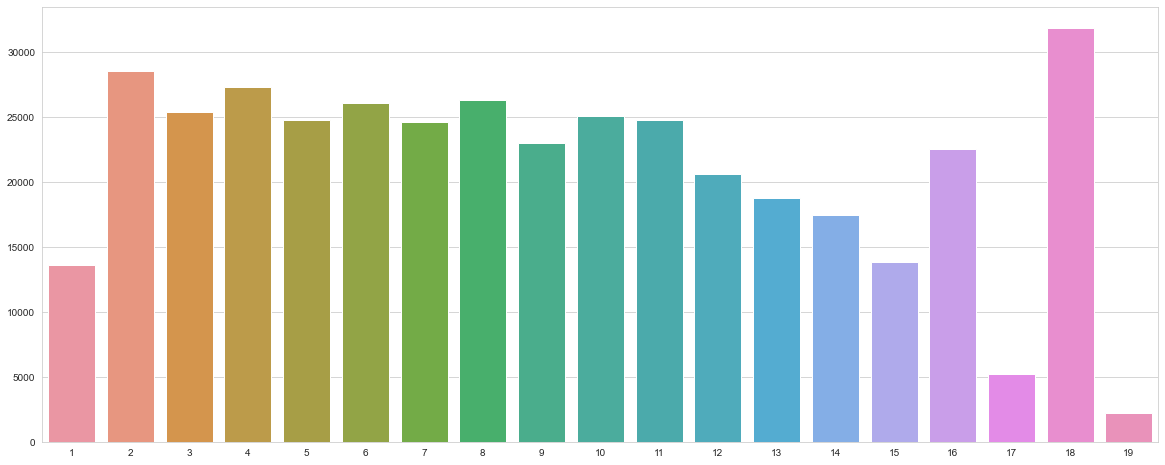

In [390]:
plt.figure(figsize=(20, 8))
sns.barplot(x=list(wordViews_75.keys()), y=list(wordViews_75.values()))

In [391]:
# Reading level Flech Kinkaid
#https://pypi.org/project/textstat/
import textstat

df_25['FK Reading Level'] = df_25['Title'].apply(lambda sent: textstat.flesch_kincaid_grade(sent))
df_25['FK Reading Level'].describe()

count    1872.000000
mean        6.224519
std         4.210213
min        -3.500000
25%         3.300000
50%         6.000000
75%         8.800000
max        32.800000
Name: FK Reading Level, dtype: float64

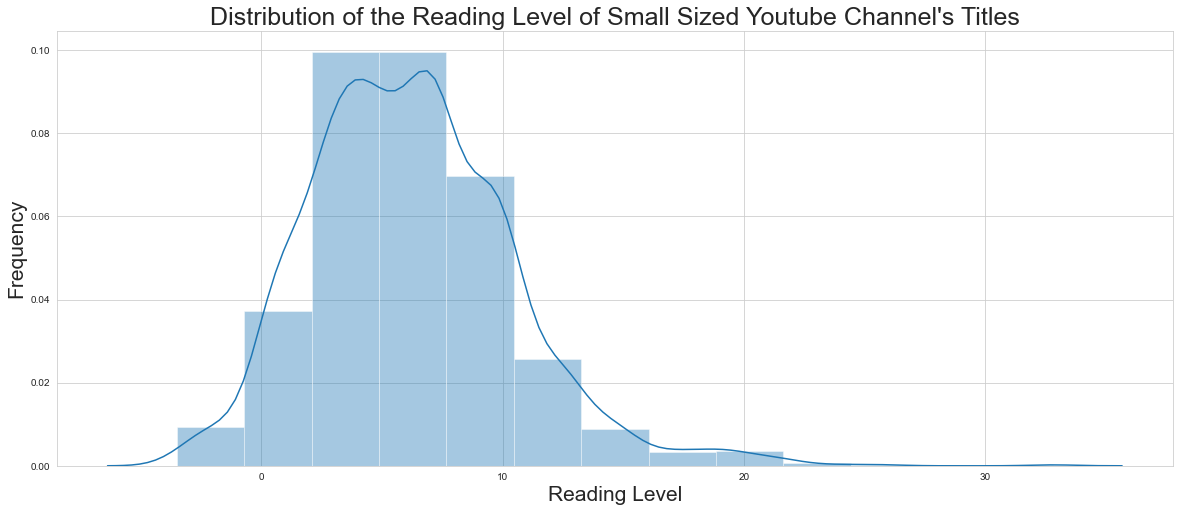

In [392]:
plt.figure(figsize=(20, 8))
sns.distplot(df_25['FK Reading Level'], bins=13)
plt.xlabel('Reading Level', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Reading Level of Small Sized Youtube Channel's Titles", fontSize=25)
plt.show()

In [393]:
df_50['FK Reading Level'] = df_50['Title'].apply(lambda sent: textstat.flesch_kincaid_grade(sent))
df_50['FK Reading Level'].describe()

count    1923.000000
mean        6.097296
std         4.161046
min       -15.700000
25%         3.300000
50%         6.000000
75%         8.400000
max        43.800000
Name: FK Reading Level, dtype: float64

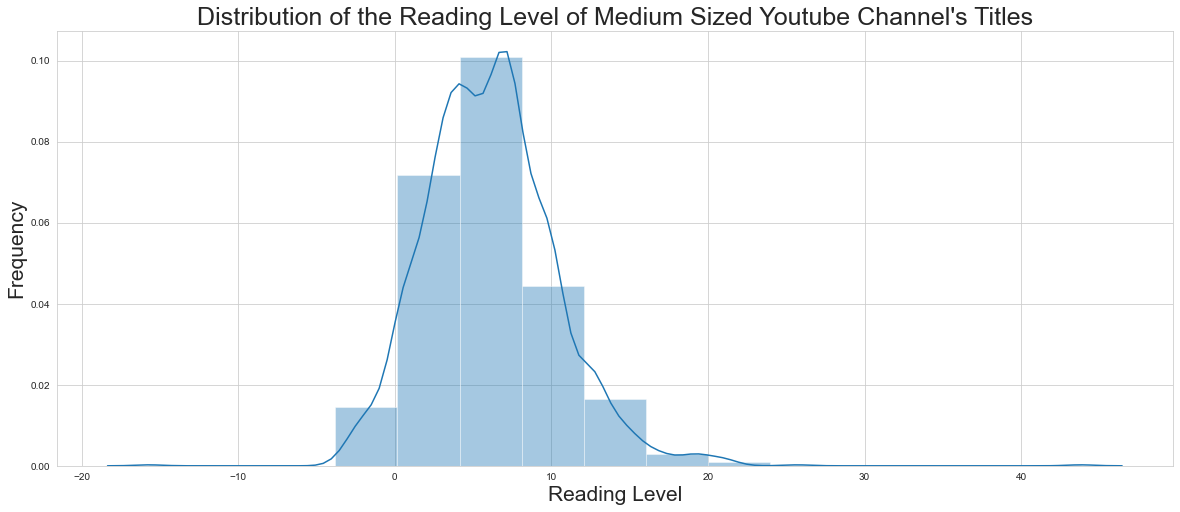

In [394]:
plt.figure(figsize=(20, 8))
sns.distplot(df_50['FK Reading Level'], bins=15)
plt.xlabel('Reading Level', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Reading Level of Medium Sized Youtube Channel's Titles", fontSize=25)
plt.show()

In [395]:
df_75['FK Reading Level'] = df_75['Title'].apply(lambda sent: textstat.flesch_kincaid_grade(sent))
df_75['FK Reading Level'].describe()

count    1909.000000
mean        5.986747
std         4.032055
min       -15.700000
25%         3.300000
50%         6.000000
75%         8.000000
max        30.800000
Name: FK Reading Level, dtype: float64

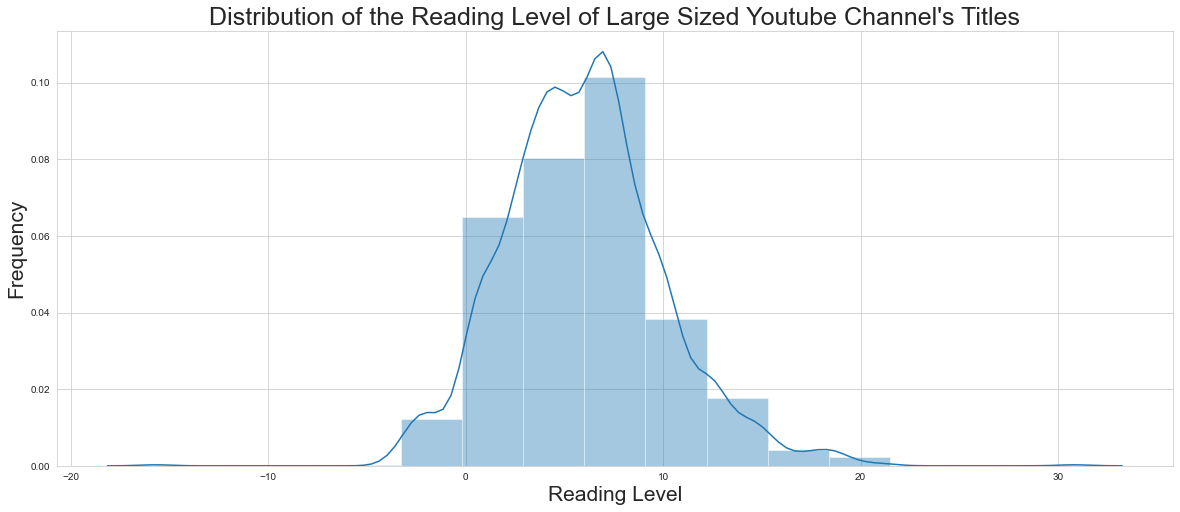

In [397]:
plt.figure(figsize=(20, 8))
sns.distplot(df_75['FK Reading Level'], bins=15)
plt.xlabel('Reading Level', fontSize=21)
plt.ylabel('Frequency', fontSize=21)
plt.title("Distribution of the Reading Level of Large Sized Youtube Channel's Titles", fontSize=25)
plt.show()

In [398]:
df_25.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 117 to 5581
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1872 non-null   int64  
 1   Channel           1872 non-null   object 
 2   Subs              1872 non-null   int64  
 3   Title             1872 non-null   object 
 4   Views             1872 non-null   int32  
 5   Link              1872 non-null   object 
 6   Likes             1872 non-null   object 
 7   Dislikes          1872 non-null   object 
 8   Description       1831 non-null   object 
 9   english           1872 non-null   bool   
 10  Title Word Count  1872 non-null   int64  
 11  FK Reading Level  1872 non-null   float64
dtypes: bool(1), float64(1), int32(1), int64(3), object(6)
memory usage: 250.0+ KB


In [408]:
df_25['Channel Size'] = "Small"
df_50['Channel Size'] = "Medium"
df_75['Channel Size'] = "Large"
df_all = pd.concat([df_25,df_50,df_75])

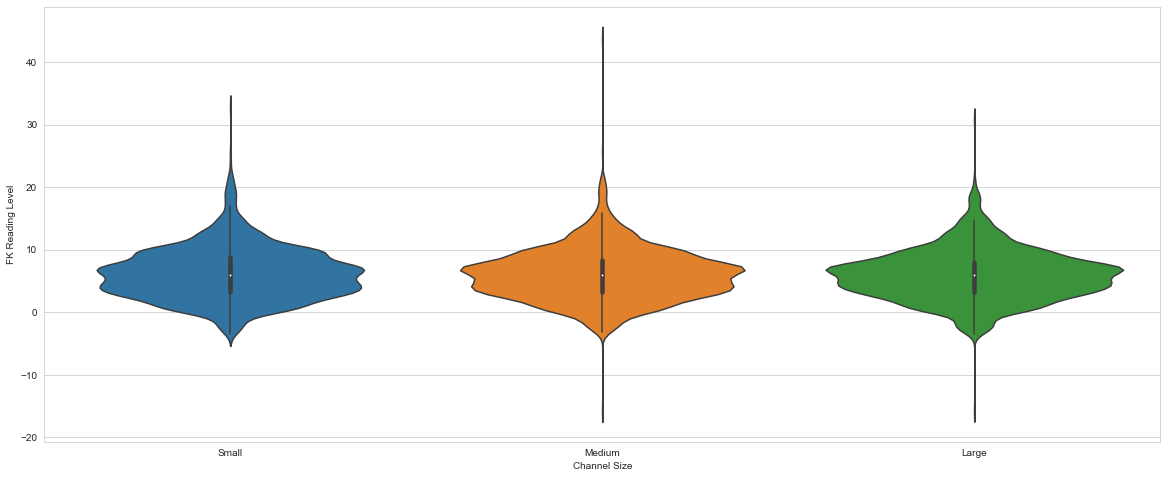

In [409]:
#https://seaborn.pydata.org/examples/grouped_violinplots.html

plt.figure(figsize=(20, 8))
sns.violinplot(data=df_all, x='Channel Size', y='FK Reading Level')
plt.show()

In [411]:
df_all.columns

Index(['Unnamed: 0', 'Channel', 'Subs', 'Title', 'Views', 'Link', 'Likes',
       'Dislikes', 'Description', 'english', 'Title Word Count',
       'FK Reading Level', 'Channel Size'],
      dtype='object')

In [414]:
df_all['Subs'].describe()

count    5.704000e+03
mean     2.281666e+05
std      4.023979e+05
min      1.490000e+04
25%      4.570000e+04
50%      1.010000e+05
75%      2.410000e+05
max      4.030000e+06
Name: Subs, dtype: float64

In [417]:
df_all['Subs Normalized'] = df_all['Subs'] / df_all['Subs'].max()

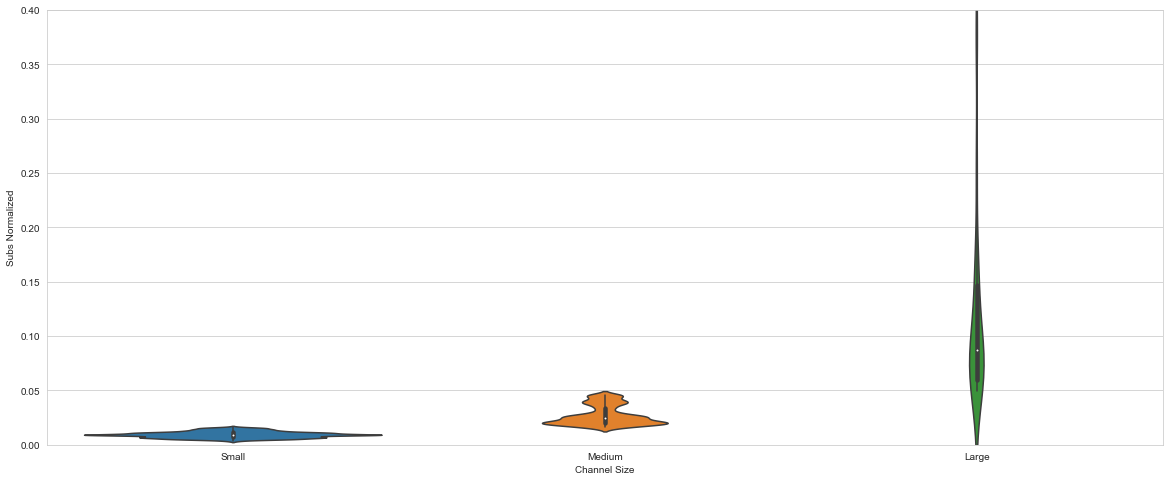

In [421]:
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_all, x='Channel Size', y='Subs Normalized')
plt.ylim([0,0.4])
plt.show()

In [422]:
df_all.columns

Index(['Unnamed: 0', 'Channel', 'Subs', 'Title', 'Views', 'Link', 'Likes',
       'Dislikes', 'Description', 'english', 'Title Word Count',
       'FK Reading Level', 'Channel Size', 'Subs Normalized'],
      dtype='object')

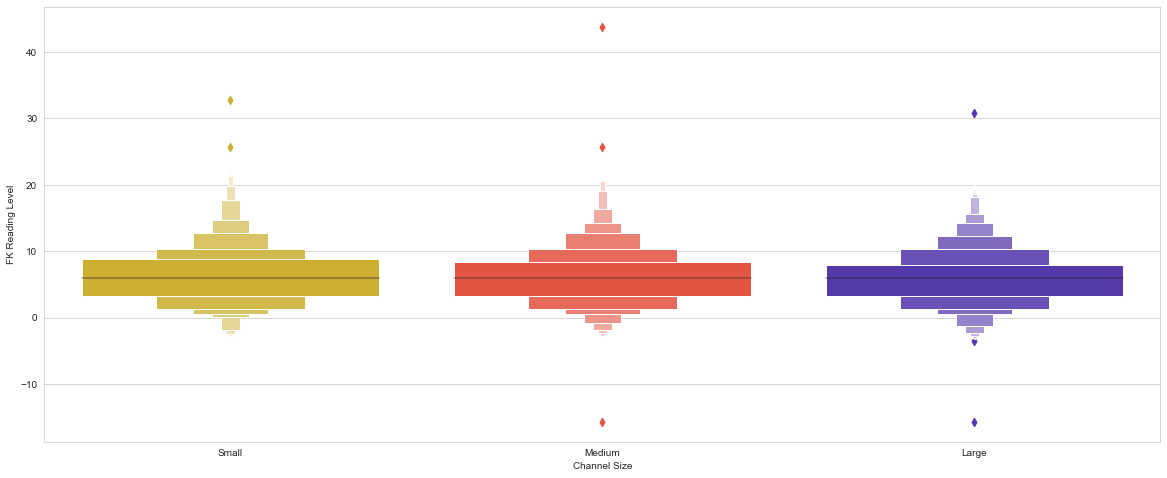

In [434]:
plt.figure(figsize=(20, 8))
sns.boxenplot(data=df_all, x='Channel Size', y='FK Reading Level', palette='CMRmap_r')
plt.show()